In [66]:
import pandas as pd

In [67]:
df_churn = pd.read_csv('Customer-Churn.csv')

In [68]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Maior65Anos              7043 non-null   int64  
 1   Conjuge                  7043 non-null   object 
 2   Dependentes              7043 non-null   object 
 3   MesesDeContrato          7043 non-null   int64  
 4   TelefoneFixo             7043 non-null   object 
 5   VariasLinhasTelefonicas  7043 non-null   object 
 6   ServicoDeInternet        7043 non-null   object 
 7   SegurancaOnline          7043 non-null   object 
 8   BackupOnline             7043 non-null   object 
 9   SeguroNoDispositivo      7043 non-null   object 
 10  SuporteTecnico           7043 non-null   object 
 11  TVaCabo                  7043 non-null   object 
 12  StreamingDeFilmes        7043 non-null   object 
 13  TipoDeContrato           7043 non-null   object 
 14  PagamentoOnline         

In [69]:
df_churn.shape

(7043, 18)

In [70]:
df_churn.head(10)

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim
5,0,Nao,Nao,8,Sim,Sim,FibraOptica,Nao,Nao,Sim,Nao,Sim,Sim,Mensalmente,Sim,ChequeDigital,99.65,Sim
6,0,Nao,Sim,22,Sim,Sim,FibraOptica,Nao,Sim,Nao,Nao,Sim,Nao,Mensalmente,Sim,CartaoDeCredito,89.10,Nao
7,0,Nao,Nao,10,Nao,SemServicoTelefonico,DSL,Sim,Nao,Nao,Nao,Nao,Nao,Mensalmente,Nao,ChequePapel,29.75,Nao
8,0,Sim,Nao,28,Sim,Sim,FibraOptica,Nao,Nao,Sim,Sim,Sim,Sim,Mensalmente,Sim,ChequeDigital,104.80,Sim
9,0,Nao,Sim,62,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,UmAno,Nao,DebitoEmConta,56.15,Nao


In [71]:
traducao = {'Sim': 1, 'Nao': 0}
df_churn_modificado = df_churn[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(traducao)

In [72]:
df_churn_modificado.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [73]:
# Realiza transposição de dados transformando dados categóricos em numéricos.
df_churn_dummies = pd.get_dummies(df_churn.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'], axis=1))

In [74]:
df_churn_dummies

,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
7039,0,72,103.20,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0
7040,0,11,29.60,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
7041,1,4,74.40,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0


In [75]:
dados_final = pd.concat([df_churn_modificado, df_churn_dummies], axis=1)

In [76]:
dados_final

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,0,24,84.80,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
7039,1,1,1,1,0,0,72,103.20,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0
7040,1,1,0,1,0,0,11,29.60,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
7041,1,0,1,1,1,1,4,74.40,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0


In [77]:
pd.set_option('display.max_columns', 39)

In [78]:
dados_final

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,0,24,84.80,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
7039,1,1,1,1,0,0,72,103.20,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0
7040,1,1,0,1,0,0,11,29.60,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
7041,1,0,1,1,1,1,4,74.40,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0


# Balanceamento dos dados

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: http://binarios.intranet.bb.com.br/artifactory/api/pypi/pypi/simple, http://atf.intranet.bb.com.br/artifactory/api/pypi/bb-python-local/simple

[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


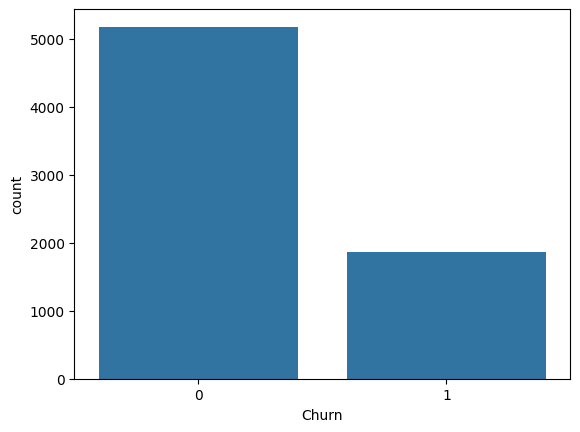

In [79]:
!pip install seaborn
import seaborn as sns
%matplotlib inline

ax = sns.countplot(x='Churn', data=dados_final)

In [80]:
!pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: http://binarios.intranet.bb.com.br/artifactory/api/pypi/pypi/simple, http://atf.intranet.bb.com.br/artifactory/api/pypi/bb-python-local/simple

[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [81]:
# Para podermos aplicar o SMOTE, devemos separar  os dados em variáveis características e resposta  

X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [82]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados

In [83]:
dados_final = pd.concat([X, y], axis=1)  # Concatena a variável target (y) com as features (X)

# Verifica se o balanceamento e a concatenação estão corretos.
dados_final.head(2)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0


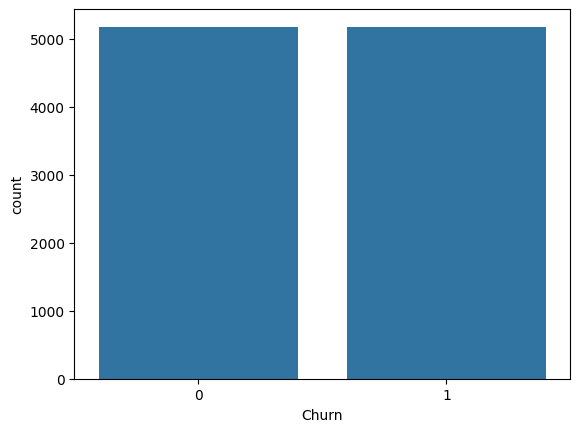

In [84]:
ax = sns.countplot(x='Churn', data=dados_final)  # plotando a variável target balanceada.

# KNN

In [85]:
# Separar variáveis dependentes (CHURN) e indenpendentes (DEMAIS)
X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

# Normalizar dados (deixar tudo na mesma escala)

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
norm = StandardScaler()

In [88]:
X_normalizado = norm.fit_transform(X)
X_normalizado

array([[ 1.26542767, -0.52756038, -3.06083934, ...,  1.30292044,
        -0.47882211, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
         2.08845829, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
         2.08845829, -0.4360152 ],
       ...,
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30292044,
        -0.47882211, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
        -0.47882211, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
        -0.47882211, -0.4360152 ]])

In [89]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

In [90]:
Xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns = X.columns))
Xmaria_normalizado

array([[-0.79024667, -0.52756038,  0.32670777,  0.81465673, -0.41350409,
        -1.14937735, -0.97235319,  1.1299503 , -0.31386908, -0.83366906,
        -0.66107688,  0.95797538, -0.44617598,  0.868102  , -0.44617598,
        -0.51766965, -0.95816089, -0.44617598,  1.57389661,  1.04285807,
         2.24126814, -0.64211419, -1.13662476,  2.24126814, -0.52426638,
         1.18667256, -0.44617598, -0.77707385, -0.83100748, -0.44617598,
         1.26620316, -0.44648735, -1.35522058,  2.38155929, -0.42576817,
        -0.76750657, -0.47882211,  2.293498  ]])

# Cálculo da distãncia Euclidiana entre dados de Maria e todos os dados do dataset. Cálculo do K.

# Implementando o Modelo

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size=0.3, random_state=132)

In [93]:
from sklearn.neighbors import KNeighborsClassifier

In [94]:
knn = KNeighborsClassifier(metric='euclidean')

In [95]:
knn.fit(X_treino, y_treino)

KNeighborsClassifier(metric='euclidean')

In [96]:
predito_knn = knn.predict(X_teste)

# Verificar o resultado da predição comparando o resultado da função predict com o y_teste

In [97]:
predito_knn

array([1, 1, 0, ..., 0, 1, 1])

In [98]:
X_treino

array([[-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
        -0.47882211, -0.4360152 ],
       [ 1.26542767,  1.89551764, -3.06083934, ..., -0.76750657,
        -0.47882211, -0.4360152 ],
       [-0.79024667, -0.52756038, -3.06083934, ..., -0.76750657,
        -0.47882211, -0.4360152 ],
       ...,
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
         2.08845829, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
        -0.47882211, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30292044,
        -0.47882211, -0.4360152 ]])

In [99]:
y_treino

3018     0
2090     0
4311     1
7009     1
10199    1
        ..
4533     0
7445     1
6314     0
1714     0
4449     0
Name: Churn, Length: 7243, dtype: int64

In [100]:
import numpy as np

In [101]:
np.median(X_treino)

-0.4461759755508453

In [102]:
from sklearn.naive_bayes import BernoulliNB

In [103]:
bnb = BernoulliNB()

In [104]:
bnb.fit(X_treino, y_treino)

BernoulliNB()

In [105]:
predito = bnb.predict(X_teste)

In [106]:
predito

array([1, 1, 1, ..., 0, 1, 1])

In [107]:
from sklearn.tree import DecisionTreeClassifier

In [108]:
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [110]:
dtc.fit(X_treino, y_treino)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [112]:
dtc.feature_importances_

array([1.92130836e-02, 1.35634066e-02, 7.10587642e-03, 2.21623744e-02,
       1.10088588e-02, 1.58165375e-01, 2.32361576e-01, 1.24864778e-02,
       3.90473132e-03, 1.15917555e-02, 2.64840342e-03, 3.13522044e-02,
       0.00000000e+00, 8.69009268e-03, 0.00000000e+00, 1.84485208e-02,
       9.21475749e-03, 0.00000000e+00, 8.65911346e-03, 8.98868923e-03,
       7.82553988e-04, 1.23215350e-02, 1.48501164e-02, 5.18816091e-03,
       1.90355748e-02, 4.65882709e-03, 0.00000000e+00, 4.91549066e-03,
       7.35574942e-03, 1.04748964e-04, 1.34543113e-02, 3.46972325e-02,
       1.53381547e-01, 7.53192813e-02, 1.83079895e-02, 1.79479106e-02,
       2.22350858e-02, 1.58785872e-02])

In [113]:
predito_ArvoreDecisao = dtc.predict(X_teste)

In [114]:
predito_ArvoreDecisao

array([0, 1, 1, ..., 0, 1, 1])

# Validação dos modelos

## Matriz de confusão

In [115]:
from sklearn.metrics import confusion_matrix

In [116]:
print(confusion_matrix(y_teste, predito_knn))

[[1234  317]
 [ 247 1307]]


In [117]:
print(confusion_matrix(y_teste, predito))

[[1103  448]
 [ 246 1308]]


In [118]:
print(confusion_matrix(y_teste, predito_ArvoreDecisao))

[[1260  291]
 [ 296 1258]]


## Acurácia
A acurácia é utilizada quando queremos saber a performance geral do modelo, isto é, dentre todas as classificações realizadas, quantas foram classificadas corretamente pelo modelo.

In [119]:
from sklearn.metrics import accuracy_score

In [120]:
print(accuracy_score(y_teste, predito_knn))

0.8183574879227054


In [121]:
print(accuracy_score(y_teste, predito))

0.7764895330112721


In [122]:
print(accuracy_score(y_teste, predito_ArvoreDecisao))

0.8109500805152979


## Precisão
A precisão é utilizada quando queremos saber dentre todas as classificações de classe Positivo realizadas pelo modelo, quantas estão corretas.


In [123]:
from sklearn.metrics import precision_score

In [124]:
print(precision_score(y_teste, predito_knn))

0.8048029556650246


In [125]:
print(precision_score(y_teste, predito))

0.744874715261959


In [126]:
print(precision_score(y_teste, predito_ArvoreDecisao))

0.8121368624919303


## Recall

In [127]:
from sklearn.metrics import recall_score

In [128]:
print(recall_score(y_teste, predito_knn))

0.8410553410553411


In [129]:
print(recall_score(y_teste, predito))

0.8416988416988417


In [130]:
print(recall_score(y_teste, predito_ArvoreDecisao))

0.8095238095238095
